One neuron net, that finds solution for line (linear equation):  
$$y=2x+1$$  
*2 = expected weight*  
*1 = expected bias*

inputs: 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10  
outputs: 1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21

In [1]:
# only for the case, when you execute it in google colab:
# !pip install torch

In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

from matplotlib import pyplot as plt
from matplotlib.ticker import AutoMinorLocator, MultipleLocator

print(torch.__version__)

1.3.1+cu100


In [3]:
inputs = torch.tensor([[0.], [1.], [2.], [3.], [4.], [5.], [6.], [7.], [8.], [9.], [10.]], dtype=torch.float32)
outputs = torch.tensor([[1.], [3.], [5.], [7.], [9.], [11.], [13.], [15.], [17.], [19.], [21.]], dtype=torch.float32)
inputs, outputs

(tensor([[ 0.],
         [ 1.],
         [ 2.],
         [ 3.],
         [ 4.],
         [ 5.],
         [ 6.],
         [ 7.],
         [ 8.],
         [ 9.],
         [10.]]), tensor([[ 1.],
         [ 3.],
         [ 5.],
         [ 7.],
         [ 9.],
         [11.],
         [13.],
         [15.],
         [17.],
         [19.],
         [21.]]))

In [4]:
training_inputs, test_inputs = torch.split(inputs, 7, dim=0)
training_inputs, test_inputs

(tensor([[0.],
         [1.],
         [2.],
         [3.],
         [4.],
         [5.],
         [6.]]), tensor([[ 7.],
         [ 8.],
         [ 9.],
         [10.]]))

In [5]:
training_outputs, test_outputs = torch.split(outputs, 7, dim=0)
training_outputs, test_outputs

(tensor([[ 1.],
         [ 3.],
         [ 5.],
         [ 7.],
         [ 9.],
         [11.],
         [13.]]), tensor([[15.],
         [17.],
         [19.],
         [21.]]))

*Plot the data:*

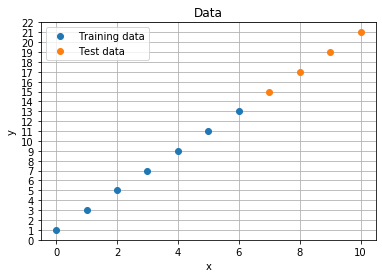

In [6]:
fig, ax = plt.subplots()

ax.plot(training_inputs, training_outputs, marker='o', linestyle='', label='Training data')
ax.plot(test_inputs, test_outputs, marker='o', linestyle='', label='Test data')

ax.set_title('Data')
ax.set_xlabel('x')
ax.set_ylabel('y')

ax.legend()
ax.yaxis.set_major_locator(MultipleLocator(1))
ax.grid(True)

plt.show()

1 fully connected (dense) layer with 1 input  
optimizer: Stochastic gradient descent  
loss function: Mean squared error https://en.wikipedia.org/wiki/Mean_squared_error  
$$\frac{1}{n}\sum_{i=1}^n (x_i-\overline{x_i})^2$$  


In [0]:
class Model(nn.Module):
    def __init__(self):
        super(Model, self).__init__()
        self.fc = nn.Linear(in_features=1, out_features=1)
        
    def forward(self, t):
        return F.relu(self.fc(t))

In [8]:
model = Model()

optimizer = optim.SGD(model.parameters(), lr=0.01)

for epoch in range(10):
    total_loss = 0

    for input, output in zip(training_inputs,training_outputs):
        
        preds = model(input)
        loss = F.mse_loss(preds, output)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        total_loss += loss.item()

    print(f'epoch: {epoch} loss: {total_loss:.2f}')

epoch: 0 loss: 48.68
epoch: 1 loss: 1.70
epoch: 2 loss: 1.22
epoch: 3 loss: 1.11
epoch: 4 loss: 1.02
epoch: 5 loss: 0.93
epoch: 6 loss: 0.86
epoch: 7 loss: 0.79
epoch: 8 loss: 0.72
epoch: 9 loss: 0.66


In [9]:
predictions = model(test_inputs).detach().numpy()
predictions

array([[15.142108],
       [17.237398],
       [19.33269 ],
       [21.427979]], dtype=float32)

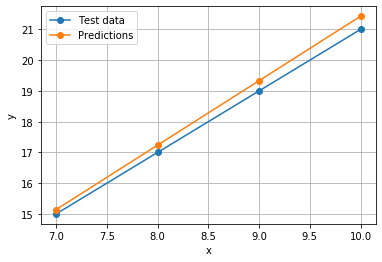

In [10]:
fig, ax = plt.subplots()

ax.plot(test_inputs, test_outputs, marker='o', label='Test data')
ax.plot(test_inputs, predictions, marker='o', label='Predictions')

ax.set_xlabel('x')
ax.set_ylabel('y')

ax.legend()
ax.yaxis.set_major_locator(MultipleLocator(1))
ax.grid(True)

plt.show()

In [12]:
weight = model.fc.weight.item()
bias = model.fc.bias.item()
weight, bias

(2.095290184020996, 0.47507649660110474)